In [1]:
import pandas as pd

### Data Loading

In [2]:
dfList = []
for i in range(1,32):
    print(".",end='', flush=True)
    dfList.append(pd.read_json("./data/2017-01-{0:02d}.txt".format(i), lines=True))
print("done!")
df = pd.concat(dfList)

...............................done!


In [3]:
print(df.fraudLabel.value_counts())
df.head()

0    30117
1      883
Name: fraudLabel, dtype: int64


,basket,fraudLabel,totalAmount,transactionId,zipCode
0,"[5, 1, 1, 4, 2, 5, 5, 0, 5]",0,693,6543306520,8600
1,"[1, 4, 1, 0, 0, 5]",0,60,4690422808,1948
2,"[1, 1]",0,142,1686204649,8518
3,"[2, 0, 0, 4, 5, 2, 0, 2, 5, 1, 5]",0,286,9619883092,1204
4,[4],0,15,9770478572,6487


### Feature Engineering

In [4]:
df['c_0'] = df.basket.map(lambda x: x.count(0))
df['c_1'] = df.basket.map(lambda x: x.count(1))
df['c_2'] = df.basket.map(lambda x: x.count(2))
df['c_3'] = df.basket.map(lambda x: x.count(3))
df['c_4'] = df.basket.map(lambda x: x.count(4))
df['c_5'] = df.basket.map(lambda x: x.count(5))

In [5]:
df.head()

,basket,fraudLabel,totalAmount,transactionId,zipCode,c_0,c_1,c_2,c_3,c_4,c_5
0,"[5, 1, 1, 4, 2, 5, 5, 0, 5]",0,693,6543306520,8600,1,2,1,0,1,4
1,"[1, 4, 1, 0, 0, 5]",0,60,4690422808,1948,2,2,0,0,1,1
2,"[1, 1]",0,142,1686204649,8518,0,2,0,0,0,0
3,"[2, 0, 0, 4, 5, 2, 0, 2, 5, 1, 5]",0,286,9619883092,1204,3,1,3,0,1,3
4,[4],0,15,9770478572,6487,0,0,0,0,1,0


In [6]:
df["zipCode"] = df["zipCode"].astype('category',categories=list(range(1000,10000)))
dummies = pd.get_dummies(df.zipCode)

C:\Users\Christian\Anaconda3\envs\dsr\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


In [7]:
dummies.shape

(31000, 9000)

In [8]:
df2 = pd.concat([df, dummies], axis=1)

In [9]:
df3 = df2.drop(["basket", "zipCode", "transactionId"], axis=1)

In [10]:
df3.head()

,fraudLabel,totalAmount,c_0,c_1,c_2,c_3,c_4,c_5,1000,1001,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,693,1,2,1,0,1,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,60,2,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,142,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,286,3,1,3,0,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,15,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Undersampling

### Model Training (Original Data)

In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df3, test_size=0.3, random_state=0)
# save data to csv
train.to_pickle("./data/train.pickle")
test.to_pickle("./data/test.pickle")
train.head()

,fraudLabel,totalAmount,c_0,c_1,c_2,c_3,c_4,c_5,1000,1001,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
281,1,430,0,0,0,2,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57,0,246,2,0,0,0,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
273,0,1365,1,2,3,2,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0
725,0,52,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,0,60,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_train = train[train.columns[1:]]
y_train = train["fraudLabel"]
X_test = test[test.columns[1:]]
y_test = test["fraudLabel"]
X_train.shape

(21700, 9007)

In [13]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Christian\Anaconda3\envs\dsr\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier()
gbt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

### Model Evaluation (Original Data)

In [15]:
test_scores_reg = logreg.predict_proba(X_test)
test_scores_gbt = gbt.predict_proba(X_test)

In [16]:
from sklearn import metrics
fpr_reg, tpr_reg, _ =  metrics.roc_curve(y_test, test_scores_reg[:,1])
auc_reg = metrics.auc(fpr_reg, tpr_reg)
fpr_gbt, tpr_gbt, _ =  metrics.roc_curve(y_test, test_scores_gbt[:,1])
auc_gbt = metrics.auc(fpr_gbt, tpr_gbt)

In [17]:
# save predictions to csv
df = pd.DataFrame(data={'label': y_test, 'predReg': test_scores_reg[:,1], 
                  'predGbt': test_scores_gbt[:,1] })
df.to_csv("./data/predictions.csv", index=False)

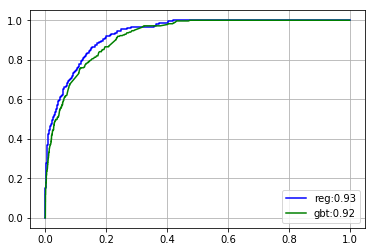

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_reg, tpr_reg, color = 'blue', label = "reg:{:.2f}".format(auc_reg))
plt.plot(fpr_gbt, tpr_gbt, color = 'green', label = "gbt:{:.2f}".format(auc_gbt))
plt.legend()
plt.grid()
plt.show()

### Save predictions on train data for modelCalibration

In [19]:
train_scores_reg = logreg.predict_proba(X_train)
train_scores_gbt = gbt.predict_proba(X_train)

In [20]:
# save predictions to csv
df = pd.DataFrame(data={'label': y_train, 'predReg': train_scores_reg[:,1], 
                  'predGbt': train_scores_gbt[:,1] })
df.to_csv("./data/predictions_train.csv", index=False)

### Model Training and Evaluation (Undersampled Data)

In [36]:
train, test = train_test_split(df3, test_size=0.3, random_state=0)

X_train = train[train.columns[1:]]
y_train = train["fraudLabel"]
X_test = test[test.columns[1:]]
y_test = test["fraudLabel"]
X_train.shape

(21700, 9007)

In [42]:
df_us = pd.concat([X_train, y_train], axis=1)
print(df_us.fraudLabel.value_counts())

0    21100
1      600
Name: fraudLabel, dtype: int64


In [43]:
df_us_true = df_us[df_us['fraudLabel']==1]
df_us_false = df_us[df_us['fraudLabel']==0]
df_us_false = df_us_false.sample(frac=600/21100).reset_index(drop=True)
df_us = pd.concat([df_us_true, df_us_false], axis=0).sample(frac=1).reset_index(drop=True)

In [51]:
X_train = df_us.drop(columns=['fraudLabel'])
y_train = df_us['fraudLabel']

In [52]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Christian\Anaconda3\envs\dsr\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
gbt = GradientBoostingClassifier()
gbt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [54]:
test_scores_reg = logreg.predict_proba(X_test)
test_scores_gbt = gbt.predict_proba(X_test)

In [55]:
fpr_reg, tpr_reg, _ =  metrics.roc_curve(y_test, test_scores_reg[:,1])
auc_reg = metrics.auc(fpr_reg, tpr_reg)
fpr_gbt, tpr_gbt, _ =  metrics.roc_curve(y_test, test_scores_gbt[:,1])
auc_gbt = metrics.auc(fpr_gbt, tpr_gbt)

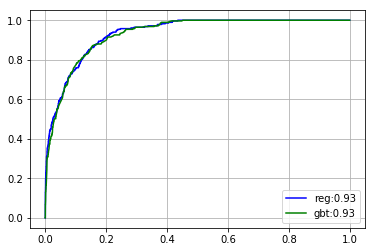

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_reg, tpr_reg, color = 'blue', label = "reg:{:.2f}".format(auc_reg))
plt.plot(fpr_gbt, tpr_gbt, color = 'green', label = "gbt:{:.2f}".format(auc_gbt))
plt.legend()
plt.grid()
plt.show()

### Model Training and Evaluation (Oversampled Data)

In [58]:
train, test = train_test_split(df3, test_size=0.3, random_state=0)

X_train = train[train.columns[1:]]
y_train = train["fraudLabel"]
X_test = test[test.columns[1:]]
y_test = test["fraudLabel"]
X_train.shape

(21700, 9007)

In [59]:
df_os = pd.concat([X_train, y_train], axis=1)
print(df_os.fraudLabel.value_counts())

0    21100
1      600
Name: fraudLabel, dtype: int64


In [60]:
df_os_true = df_os[df_os['fraudLabel']==1]
df_os_false = df_os[df_os['fraudLabel']==0]
df_os_true = pd.concat([df_os_true]*round(21100/600))
df_os = pd.concat([df_os_true, df_os_false], axis=0).sample(frac=1).reset_index(drop=True)

In [61]:
X_train = df_os.drop(columns=['fraudLabel'])
y_train = df_os['fraudLabel']

In [63]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Christian\Anaconda3\envs\dsr\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
gbt = GradientBoostingClassifier()
gbt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [65]:
test_scores_reg = logreg.predict_proba(X_test)
test_scores_gbt = gbt.predict_proba(X_test)

In [66]:
fpr_reg, tpr_reg, _ =  metrics.roc_curve(y_test, test_scores_reg[:,1])
auc_reg = metrics.auc(fpr_reg, tpr_reg)
fpr_gbt, tpr_gbt, _ =  metrics.roc_curve(y_test, test_scores_gbt[:,1])
auc_gbt = metrics.auc(fpr_gbt, tpr_gbt)

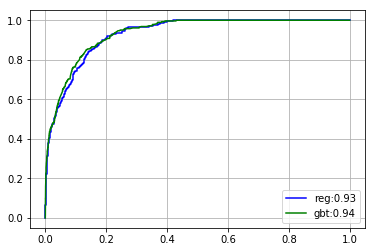

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_reg, tpr_reg, color = 'blue', label = "reg:{:.2f}".format(auc_reg))
plt.plot(fpr_gbt, tpr_gbt, color = 'green', label = "gbt:{:.2f}".format(auc_gbt))
plt.legend()
plt.grid()
plt.show()